In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

In [2]:
df = pd.read_csv('cwurData.csv')

In [3]:
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,1,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,4,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,2,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,12,18,85.21,2012


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

<Axes: >

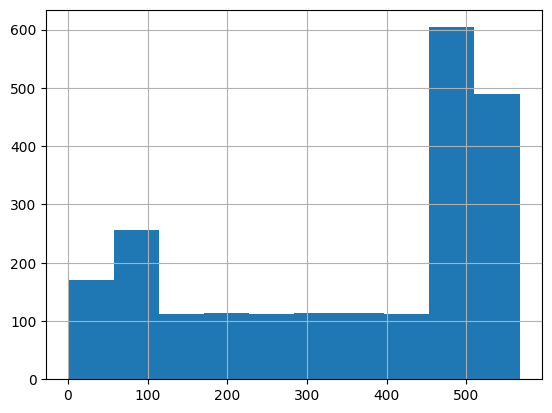

In [6]:
df['alumni_employment'].hist()

In [7]:
df.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [8]:
X = df[['national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty',
        'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score', 'year']]

# have only the target variable here (dependent variable)
y = df['world_rank']

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [10]:
training_variable_amount = len(X.columns)

model = keras.Sequential(
    [
        layers.Dense(12, activation="relu", input_shape=(training_variable_amount,)),
        layers.Dense(8, activation="relu"),
        layers.Dense(1)
    ]
)

model.compile(optimizer='adam', loss='mse')
model.summary()

model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_val, y_val))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000

49/49 [==============================] - 1s 4ms/step - loss: 475632.5312 - val_loss: 133209.1406
Epoch 2/1000
49/49 [==============================] - 0s 2ms/step - loss: 60777.9648 - val_loss: 25583.6270
Epoch 3/1000
49/49 [==============================] - 0s 2ms/step - l

<Axes: >

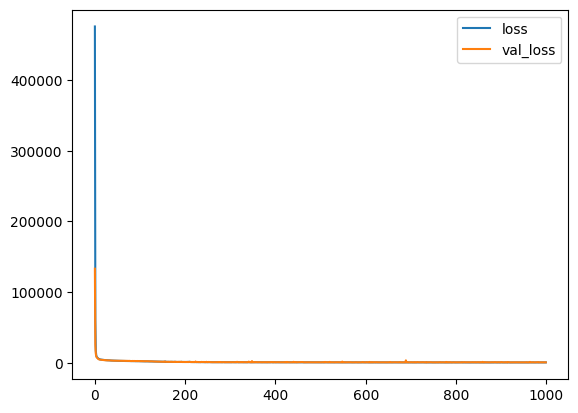

In [11]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [12]:
# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
780.3738403320312

Train data evaluation:
685.4038696289062


In [13]:
test_predictions = model.predict(X_test)

# reshape the data for easier comparison table
test_predictions = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# print the comparison table - true values vs. model predicted values
# we can nicely see here how far off our model is in some cases
pred_df

11/11 [==============================] - 0s 1ms/step


,Test True Y,Model Predictions
0,757,747.508728
1,91,91.995056
2,639,658.408630
3,855,854.096802
4,154,152.022263
...,...,...
325,87,74.640671
326,376,383.107788
327,290,221.960754
328,625,614.172485


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

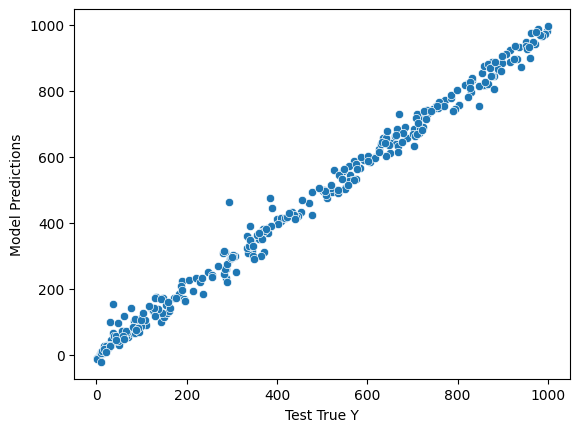

In [14]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [15]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

# Explained Variance Score => 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
# high variance score = model is a good fit for the data 
# low variance score = model is not a good fit for the data
# the higher the score, the model is more able to explain the variation in the data
# if score is low, we might need more and better data
print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
19.48 $

MSE
780.37 $^2

RMSE:
27.94 $

R-squared:
0.99

Explained variance score:
0.99


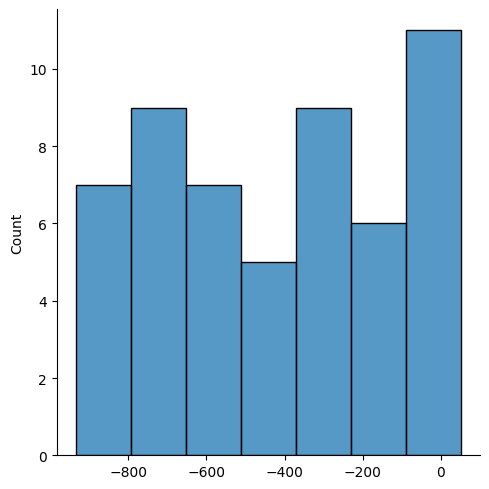

In [16]:
sns.displot((y_test - test_predictions))
plt.show()
plt.close()

In [17]:
tester_row = {
    'national_rank': 20,
    'quality_of_education': 300,
    'alumni_employment': 300,
    'quality_of_faculty': 200,
    'publications': 175,
    'influence': 500,
    'citations': 160,
    'broad_impact': 500,
    'patents': 500,
    'score': 150,
    'year': 2015
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

result = model.predict(tester_row)[0]

print()
print(f"Estimated World Rank:")
print(f"{round(float(result), 2)}")
print("----------------")

1/1 [==============================] - 0s 68ms/step

Estimated World Rank:
218.88
----------------


C:\Users\Roman\AppData\Local\Temp\ipykernel_25932\2087565283.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"{round(float(result), 2)}")


In [18]:
df.describe()

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,458.770455,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,299.688240,273.996525,7.760806,0.762130
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,184.000000,170.750000,44.460000,2014.000000
50%,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,447.000000,426.000000,45.100000,2014.000000
75%,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,716.000000,714.250000,47.545000,2015.000000
max,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


In [19]:
model.save('Dataset1.keras')